# K-NN, K-Nearest Neighbors

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

[]

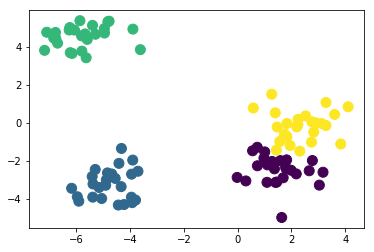

In [2]:
data, features = make_blobs(n_samples=100, n_features=2, centers=4, shuffle=True, cluster_std=0.8)
fig, ax = plt.subplots()
ax.scatter(data.transpose()[0], data.transpose()[1], c=features, marker='o', s=100)
plt.plot()

In [3]:
def distance(sample, data):
    distances = np.zeros(len(data))
    for i in range(0, len(data)):
        dist = np.sqrt(sum(pow(np.subtract(sample, data[i]), 2)))
        distances[i] = dist
    return distances

In [4]:
def add_sample(newsample, data, features):
    distances = np.zeros((len(data), len(data[0])))
    #calculate the distance of the new sample and the current data
    distances = distance(newsample, data)
    closestneighbors = np.argpartition(distances, 3)[:3]
    closestgroups = features[closestneighbors]
    return np.argmax(np.bincount(closestgroups))

In [5]:
def knn(newdata, data, features):
    for i in newdata:
        test = add_sample(i, data, features);
        features = np.append(features, [test], axis=0)
        data = np.append(data, [i], axis=0)
    return data, features

In [6]:
newsamples = np.random.rand(20, 2)*20 - 8.
finaldata, finalfeatures = knn(newsamples, data, features)

[]

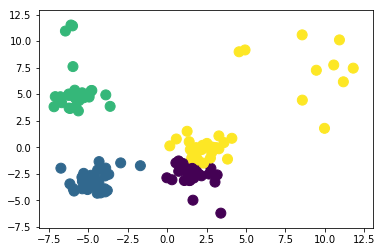

In [7]:
fig, ax = plt.subplots()
ax.scatter(finaldata.transpose()[0], finaldata.transpose()[1], c=finalfeatures, marker='o', s=100)
ax.scatter(newsamples.transpose()[0], newsamples.transpose()[1], c='none', marker='s', s=100)
plt.plot()